<img style="float: right; height: 100px" src="https://www.wekeo.eu/themes/charabimba/images/logo-ecmwf_0.png" />

# Polytope Client

## Installation on Jupyterhub
Open the terminal and install from source (not yet available on pypi):
```
cd /shared/eduard/polytope-client
python3.6 setup.py sdist
python3.6 -m pip install dist/polytope_client-0.1.0.tar.gz --user
```

In [ ]:
from polytope_client import api
c = api.Client()
# you will be prompted for a password the first time
# and a token will be stored locally
c.set_config(key="username", value="<your polytope username here>")

In [ ]:
filename = '/shared/eduard/polytope_request_test.grib'
request = """
    collection = fc,
    stream = oper,
    levtype = sfc,
    param = 165.128/166.128/167.128,
    dataset = interim,
    step = 0,
    grid = 0.75/0.75,
    time = 00/06/12/18,
    date = 2015-03-23/to/2015-03-24,
    type = an,
    class = ei,
    expver = 0001,
    target = """
 
c.retrieve(request = request, output_file = filename, inline_request = True)

In [ ]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# read dwd grib data from local directory
tmp = xr.open_dataset(filename, engine='cfgrib')

In [4]:
tmp

<xarray.Dataset>
Dimensions:     (latitude: 241, longitude: 480, time: 8)
Coordinates:
    number      int64 ...
  * time        (time) datetime64[ns] 2015-03-23 ... 2015-03-24T18:00:00
    step        timedelta64[ns] ...
    surface     int64 ...
  * latitude    (latitude) float64 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
  * longitude   (longitude) float64 0.0 0.75 1.5 2.25 ... 357.8 358.5 359.2
    valid_time  (time) datetime64[ns] ...
Data variables:
    u10         (time, latitude, longitude) float32 ...
    v10         (time, latitude, longitude) float32 ...
    t2m         (time, latitude, longitude) float32 ...
Attributes:
    GRIB_edition:            1
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2019-11-26T14:08:55 GRIB to CDM+CF vi

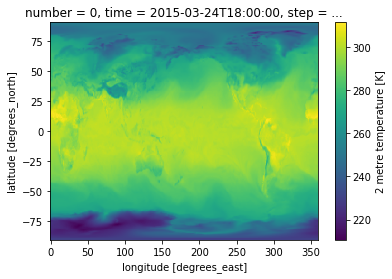

In [5]:
tmp.t2m.sel(time='2015-03-24T18:00:00').plot(x="longitude", y="latitude")

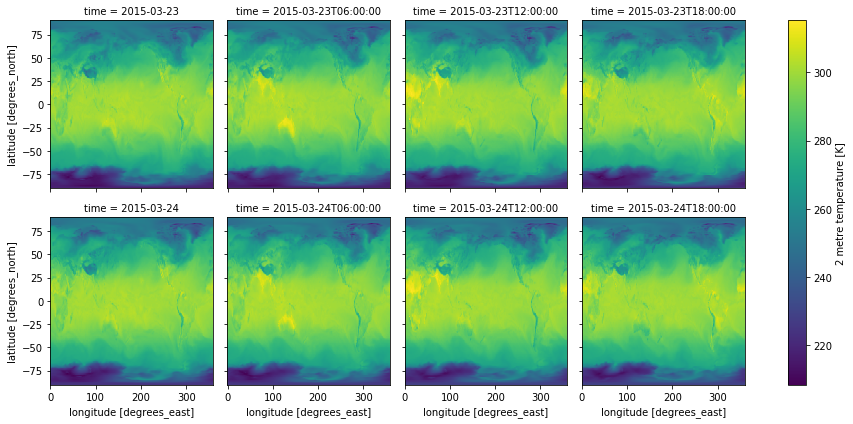

In [6]:
tmp.t2m.plot(x="longitude", y="latitude", col="time", col_wrap=4)